In [1]:
import trig_poly
import dual_certificates
import test_data
import numpy as np
import plt_util

%matplotlib inline

In [2]:
reload(test_data)
reload(dual_certificates)

N = 8
m = 4
fc = 30
min_separation = 0.25 / N

kernel = trig_poly.TrigPoly.dirichlet(fc)

support = test_data.uniform_supports(N, min_separation=min_separation)
sign_pattern = test_data.uniform_sign_pattern_multidim(N, m)

interpolator_1 = dual_certificates.interpolate_multidim(support, sign_pattern, kernel)

ValueError: x and y must have same first dimension, but have shapes (200,) and (4,)

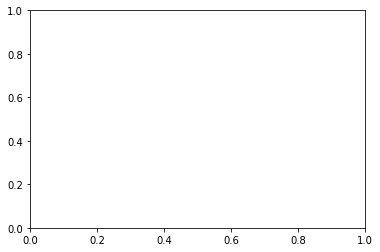

In [3]:
reload(plt_util)
plt_util.plot_trig_poly_magnitude(interpolator_1)
plt_util.plot_support_magnitude_lines(support)
plt_util.plot_magnitude_bounds()

In [18]:
sign_pattern[0, :]

array([ 0.37811261+0.41782337j,  0.29435717-0.18088898j,
        0.18220269-0.07578482j, -0.71174798+0.13251858j])

In [19]:
interpolator_1(support[0])

array([[ 0.37811261+0.41782337j],
       [ 0.29435717-0.18088898j],
       [ 0.18220269-0.07578482j],
       [-0.71174798+0.13251858j]])

In [13]:
reload(dual_certificates)
dual_certificates.validate(support, sign_pattern, interpolator_1)

{'bound_achieved': False, 'status': False, 'values_achieved': False}